In [37]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
cv2.__version__

## CUDA-accelerated Computer Vision
- Core part
- Operations on Matrices
- Background Segmentation
- Video Encoding/Decoding
- Feature Detection and Description
- Image Filtering
- Image Processing
- Legacy support
- Object Detection
- Optical Flow
- Stereo Correspondence
- Image Warping
- Device layer

### 1. Core Part > Initialization and Information

In [ ]:
# 1.1 check CUDA enable device 

count = cv2.cuda.getCudaEnabledDeviceCount()

print("Number of CUDA device %d" % count)

In [ ]:
# 1.2 Get Current Device Index

idx = cv2.cuda.getDevice()

print("Current Device index %d" % idx)

### 2. Core Part > Data Structures

In [33]:
# 2.1 CUDA GPU MAT

img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)
src = cv2.cuda_GpuMat()
src.upload(img)

result = src.download()

In [28]:
result.shape, img.shape

((344, 354), (344, 354))

### 3. Operations on Matrices > Core Operations on Matrices

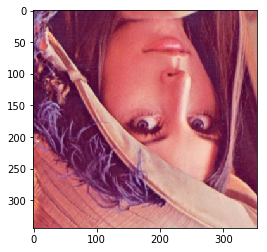

In [44]:
# 3.1 Flip Image using CUDA
FLIP_CODE = 0 # 0 : x-axis flip, > 0 : y-axis flip, < 0 : both flip

img = cv2.imread("lena.jpg")
src = cv2.cuda_GpuMat()
src.upload(img)
dst = cv2.cuda.flip(src, FLIP_CODE)
result = dst.download()

plt.imshow(result[:,:,::-1])

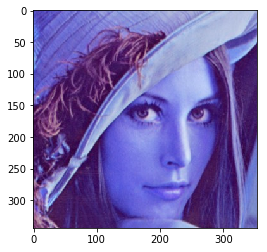

In [65]:
# 3.2 Split & Merge Image using CUDA

img = cv2.imread("lena.jpg")
b, g, r = cv2.cuda.split(img)
result = cv2.cuda.merge([r,g,b])

plt.imshow(result[:,:,::-1])


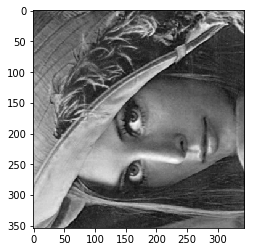

In [72]:
# 3.3 Image Transpose using CUDA

img = cv2.imread("lena.jpg")
dst = cv2.cuda.transpose(img[:,:,0])

plt.imshow(dst, cmap="gray")

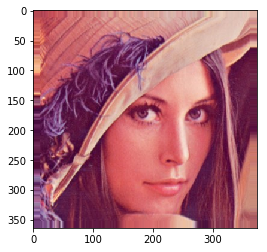

In [80]:
# 3.4 Make Border Image using CUDA

img = cv2.imread("lena.jpg")

dst = cv2.cuda.copyMakeBorder(img, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_REPLICATE)
# borderType : BORDER_REFLECT101 , BORDER_REPLICATE , BORDER_CONSTANT , BORDER_REFLECT and BORDER_WRAP

plt.imshow(dst[:,:,::-1])

### 4. Operations on Matrices > Per-element Operations

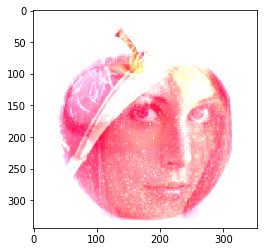

In [82]:
# 4.1 Image Addition using CUDA

img1 = cv2.imread("lena.jpg")
img2 = cv2.imread("apple.jpg")

dst = cv2.cuda.add(img1, img2)

plt.imshow(dst[:,:,::-1])

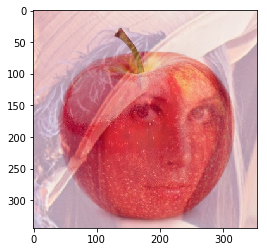

In [93]:
# 4.2 Image Addition Wighted using CUDA

img1 = cv2.imread("lena.jpg")
img2 = cv2.imread("apple.jpg")

alpha = 0.4
beta = 1 - alpha
gamma = 0

dst = cv2.cuda.addWeighted(img1, alpha, img2, beta, gamma)

plt.imshow(dst[:,:,::-1])

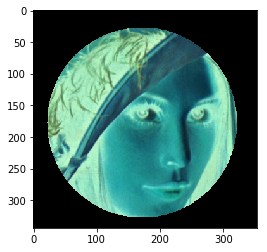

In [138]:
# 4.3 Image Bitwise Operation (AND, OR, NOT, XOR) using CUDA
# AND + mask : ERROR 
# OR + mask : ERROR
# XOR + mask : ERROR


img = cv2.imread("lena.jpg")

mask = np.zeros(img.shape[:2]).astype(np.uint8)
h, w = mask.shape
cv2.circle(mask, (h//2, w//2), 150, (255,255,255), -1)

dst = cv2.cuda.bitwise_not(img, img, mask = mask)

plt.imshow(dst[:,:,::-1])

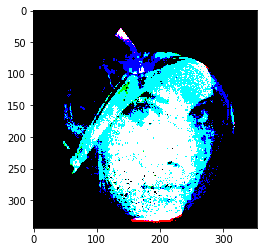

In [140]:
# 4.4 Image Compare using CUDA
#CMP_EQ: a(.) == b(.)
#CMP_GT: a(.) > b(.)
#CMP_GE: a(.) >= b(.)
#CMP_LT: a(.) < b(.)
#CMP_LE: a(.) <= b(.)
#CMP_NE: a(.) != b(.)


img1 = cv2.imread("lena.jpg")
img2 = cv2.imread("apple.jpg")

dst=cv2.cuda.compare(img1, img2, cmpop=cv2.CMP_GT)

plt.imshow(dst[:,:,::-1])

In [153]:
help(cv2.cuda.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst[, stream]]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   @param src Source array (single-channel).
    .   @param dst Destination array with the same size and type as src .
    .   @param thresh Threshold value.
    .   @param maxval Maximum value to use with THRESH_BINARY and THRESH_BINARY_INV threshold types.
    .   @param type Threshold type. For details, see threshold . The THRESH_OTSU and THRESH_TRIANGLE
    .   threshold types are not supported.
    .   @param stream Stream for the asynchronous version.
    .   
    .   @sa threshold



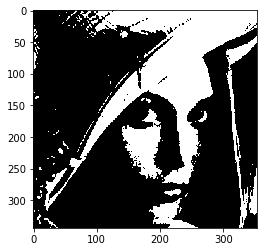

In [154]:
# 4.4 Image Thresholding using CUDA
# type = THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV

img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)


ret, thresh = cv2.cuda.threshold(img, 150, 255, type=cv2.THRESH_BINARY)

plt.imshow(thresh, cmap="gray")


### 5. Performance Comparison (CUDA GPU & CPU)


In [169]:
# CPU Performance

times = []

cap = cv2.VideoCapture(0)

for i in range(100) :
    ret, frame = cap.read()
    if not ret :
        break
    e1 = cv2.getTickCount()

    # flip image
    frame = cv2.flip(frame, 0)
    
    # # split & merge
    # b, g, r = cv2.split(frame)
    # frame = cv2.merge([r,g,b])

    # # apply threshold
    # ret, thresh = cv2.threshold(frame, 150, 255, type=cv2.THRESH_BINARY)

    e2 = cv2.getTickCount()
    time = (e2 - e1)/ cv2.getTickFrequency()
    times.append(time)

cap.release()
exe_mean = np.array(times).mean()
print("average execution time %.4f" % exe_mean)


average execution time 0.0057


In [181]:
# CUDA GPU Performance

times = []

cap = cv2.VideoCapture(0)
src = cv2.cuda_GpuMat()
for i in range(100) :
    ret, frame = cap.read()
    if not ret :
        break
    e1 = cv2.getTickCount()

    # flip image
    src.upload(frame)
    dst = cv2.cuda.flip(src, 0)
    frame = dst.download()
    
    # # split & merge
    # b, g, r = cv2.cuda.split(frame)
    # frame = cv2.cuda.merge([r,g,b])

    # # apply threshold
    # ret, thresh = cv2.cuda.threshold(frame, 150, 255, type=cv2.THRESH_BINARY)

    e2 = cv2.getTickCount()
    time = (e2 - e1)/ cv2.getTickFrequency()
    times.append(time)

cap.release()
exe_mean = np.array(times).mean()
print("average execution time %.4f" % exe_mean)


average execution time 0.0447
